# MovieLens Neighborhood Based Recommendation with GraphLab

In [1]:
import numpy as np
import pandas as pd
import graphlab
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.cross_validation import train_test_split

#prepare the data
r_cols = ['movie_id','itle','genres','user_id', 'rating', 'unix_timestamp']
ratings=pd.read_csv('ratings.csv', sep=',', encoding='latin-1')
movies=graphlab.SFrame.read_csv('movies.csv')
tags=graphlab.SFrame.read_csv('tags.csv')

#split the data into training and validation sets
train, test = train_test_split(ratings, test_size=0.2)
train=graphlab.SFrame(train)
test=graphlab.SFrame(test)


#train the Recommender Model
itemSimModel_pearson = graphlab.item_similarity_recommender.create(train, user_id='userId', item_id='movieId', target='rating', similarity_type='pearson')
itemSimModel_cosine = graphlab.item_similarity_recommender.create(train, user_id='userId', item_id='movieId', target='rating', similarity_type='cosine')
itemSimModel_pearson.evaluate_rmse(test,target='rating')
graphlab.recommender.util.compare_models(test,[itemSimModel_pearson])



[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1510069886.log


This non-commercial license of GraphLab Create for academic use is assigned to bindi.patel@columbia.edu and will expire on November 07, 2018.


Finished parsing file /Users/B.Patel@ibm.com/Downloads/movies.csv

Parsing completed. Parsed 100 lines in 0.04661 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/B.Patel@ibm.com/Downloads/movies.csv

Parsing completed. Parsed 9125 lines in 0.044908 secs.

Finished parsing file /Users/B.Patel@ibm.com/Downloads/tags.csv

Parsing completed. Parsed 100 lines in 0.024499 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/B.Patel@ibm.com/Downloads/tags.csv

Parsing completed. Parsed 1296 lines in 0.016172 secs.

Recsys training: model = item_similarity

Warning: Ignoring columns timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80003 observations with 671 users and 8390 items.

Data prepared in: 0.142477s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 5.677ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 182.78ms                            | 0                | 0               |

| 1.88s                               | 100              | 8390            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 2.94442s

Recsys training: model = item_similarity

Warning: Ignoring columns timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80003 observations with 671 users and 8390 items.

Data prepared in: 0.156715s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 11.706ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 200.292ms                           | 0                | 3               |

| 1.49s                               | 100              | 8390            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.55922s

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |        0.0        |        0.0        |
|   2    |        0.0        |        0.0        |
|   3    |        0.0        |        0.0        |
|   4    |        0.0        |        0.0        |
|   5    |        0.0        |        0.0        |
|   6    |        0.0        |        0.0        |
|   7    |        0.0        |        0.0        |
|   8    |        0.0        |        0.0        |
|   9    |        0.0        |        0.0        |
|   10   | 0.000298953662182 | 5.26945350498e-05 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.168914852117448)

Per User RMSE (best)
+--------+-------+----------------+
| userId | count |      rmse      |
+--------+-------+----------------+
|  636   |   6

[{'precision_recall_by_user': Columns:
  	userId	int
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 12042
  
  Data:
  +--------+--------+-----------+--------+-------+
  | userId | cutoff | precision | recall | count |
  +--------+--------+-----------+--------+-------+
  |   1    |   1    |    0.0    |  0.0   |   3   |
  |   1    |   2    |    0.0    |  0.0   |   3   |
  |   1    |   3    |    0.0    |  0.0   |   3   |
  |   1    |   4    |    0.0    |  0.0   |   3   |
  |   1    |   5    |    0.0    |  0.0   |   3   |
  |   1    |   6    |    0.0    |  0.0   |   3   |
  |   1    |   7    |    0.0    |  0.0   |   3   |
  |   1    |   8    |    0.0    |  0.0   |   3   |
  |   1    |   9    |    0.0    |  0.0   |   3   |
  |   1    |   10   |    0.0    |  0.0   |   3   |
  +--------+--------+-----------+--------+-------+
  [12042 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use print_rows(num_rows=m, num_columns=n) to print more ro

In [2]:
#print sample from model- Top 3 for first 10 entries
itemSimModel_pearson.recommend(users=range(1,11),k=3)


userId,movieId,score,rank
1,26150,5.0,1
1,36931,5.0,2
1,138696,5.0,3
2,26150,5.0,1
2,36931,5.0,2
2,138696,5.0,3
3,26150,5.0,1
3,36931,5.0,2
3,138696,5.0,3
4,26150,5.0,1


# Evaluation Metrics & Interactive View of Model 

We can see below that the Pearson Correlation evaluation method has a smaller RMSE than the cosine correlation as the Pearson Correlation Coefficient takes into account the differences in users' rating scales.

In [3]:
pearson_eval = itemSimModel_pearson.evaluate(test)



Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |        0.0        |        0.0        |
|   2    |        0.0        |        0.0        |
|   3    |        0.0        |        0.0        |
|   4    |        0.0        |        0.0        |
|   5    |        0.0        |        0.0        |
|   6    |        0.0        |        0.0        |
|   7    |        0.0        |        0.0        |
|   8    |        0.0        |        0.0        |
|   9    |        0.0        |        0.0        |
|   10   | 0.000298953662182 | 5.26945350498e-05 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.168914852117448)

Per User RMSE (best)
+--------+-------+----------------+
| userId | count |      rmse      |
+--------+-------+----------------+
|  636   |   6   | 0.240186804785 |
+-----

In [4]:
cosine_eval = itemSimModel_cosine.evaluate(test) 



Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.333333333333 | 0.0212131235535 |
|   2    | 0.323617339312 | 0.0398644370446 |
|   3    | 0.309915296462 | 0.0560389054863 |
|   4    | 0.301195814649 | 0.0710268200946 |
|   5    | 0.287593423019 | 0.0824232593371 |
|   6    | 0.273791728949 | 0.0935983071735 |
|   7    | 0.268417680974 |  0.107045370612 |
|   8    | 0.262331838565 |  0.119626773564 |
|   9    | 0.253944527487 |  0.12927264097  |
|   10   | 0.24514200299  |  0.136984503306 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 3.6009347508333382)

Per User RMSE (best)
+--------+-------+------+
| userId | count | rmse |
+--------+-------+------+
|  579   |   3   | 0.5  |
+--------+-------+------+
[1 rows x 3 columns]


Per User RMSE (worst)
+--------+-------+---------------+
| userId 

The following visualization provides a working interface of the model that recommends movies to an individual as well as provides a list of movies that may be liked given a movie of interest.

In [5]:
view = itemSimModel_pearson.views.overview(
        validation_set=test,
        item_data=movies)

view.show()


# Ranking Factorization

A RankingFactorizationRecommender "learns latent factors for each user and item and uses them to rank recommended items according to the likelihood of observing those (user, item) pairs. This is commonly desired when performing collaborative filtering for implicit feedback datasets or datasets with explicit ratings for which ranking prediction is desired."

In [6]:
#Naive factorization Model
m1 = graphlab.ranking_factorization_recommender.create(test,  user_id='userId', item_id='movieId', target='rating')

m1.recommend(users=range(1,11),k=500)

#The following produces the ratings matrix for the given ranking factor recommender
#m1.predict(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 20001 observations with 669 users and 4864 items.

Data prepared in: 0.090102s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 20001 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 16.6667           | Not Viable                               |

| 1       | 4.16667           | Not Viable                               |

| 2       | 1.04167           | Not Viable                               |

| 3       | 0.260417          | Not Viable                               |

| 4       | 0.0651042         | 1.43154                                  |

| 5       | 0.0325521         | 1.53753                                  |

| 6       | 0.016276          | 1.691                                    |

| 7       | 0.00813802        | 1.78228                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0651042         | 1.43154                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 92us         | 2.18627           | 1.05595               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 154.72ms     | 2.2962            | 1.1809                | 0.0651042   |

| 2       | 249.041ms    | 1.81333           | 1.00855               | 0.0651042   |

| 3       | 362.664ms    | 1.65402           | 0.941913              | 0.0651042   |

| 4       | 473.899ms    | 1.56029           | 0.899335              | 0.0651042   |

| 5       | 606.928ms    | 1.49526           | 0.865953              | 0.0651042   |

| 6       | 735.732ms    | 1.44913           | 0.84451               | 0.0651042   |

| 10      | 1.23s        | 1.30176           | 0.772735              | 0.0651042   |

| 11      | 1.32s        | 1.25636           | 0.752076              | 0.0651042   |

| 20      | 2.61s        | 0.988864          | 0.624491              | 0.0651042   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.829835

Final training RMSE: 0.521221

userId,movieId,score,rank
1,608,4.98279725133,1
1,296,4.9502379757,2
1,318,4.87081624685,3
1,590,4.78243361531,4
1,110,4.719793604,5
1,50,4.7017150384,6
1,1288,4.69180832921,7
1,1240,4.68170826255,8
1,1617,4.66039751588,9
1,246,4.6354652506,10


In [7]:
#Model with movie information
m2 = graphlab.ranking_factorization_recommender.create(test,  user_id='userId', item_id='movieId', item_data=movies, target='rating')
m2.recommend(users=range(1,11))

#The following produces the ratings matrix for the given ranking factor recommender that adds movie genres as a side feature
#m2.predict(test)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 20001 observations with 669 users and 9125 items.

Data prepared in: 0.079768s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 20001 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | Not Viable                               |

| 4       | 0.0390625         | 1.02828                                  |

| 5       | 0.0195312         | 1.39732                                  |

| 6       | 0.00976562        | 1.5969                                   |

| 7       | 0.00488281        | 1.76507                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0390625         | 1.02828                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 86us         | 2.18652           | 1.05597               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 125.461ms    | 2.03865           | 1.10046               | 0.0390625   |

| 2       | 272.185ms    | 1.56222           | 0.903662              | 0.0390625   |

| 3       | 412.173ms    | 1.49982           | 0.861186              | 0.0390625   |

| 4       | 534.852ms    | 1.47949           | 0.841729              | 0.0390625   |

| 5       | 633.838ms    | 1.41919           | 0.811402              | 0.0390625   |

| 6       | 798.653ms    | 1.27405           | 0.751811              | 0.0390625   |

| 10      | 1.26s        | 0.9254            | 0.583029              | 0.0390625   |

| 11      | 1.39s        | 0.87157           | 0.553685              | 0.0390625   |

| 20      | 2.50s        | 0.527898          | 0.366065              | 0.0390625   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.399833

Final training RMSE: 0.272897

userId,movieId,score,rank
1,2858,4.26692845045,1
1,858,4.17885151623,2
1,318,4.12555384754,3
1,1196,4.08581908165,4
1,1617,4.07420595853,5
1,2028,4.06416508673,6
1,1682,4.01185158385,7
1,1198,4.00430622815,8
1,111,4.00018179534,9
1,296,3.96915932676,10


In [8]:
#Model with tag information
m3 = graphlab.ranking_factorization_recommender.create(test,  user_id='userId', item_id='movieId', item_data=tags, target='rating')
m3.recommend(users=range(1,11),k=3)

#The following produces the ratings matrix for the given ranking factor recommender that adds movie tags as a side feature
#m3.predict(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 20001 observations with 669 users and 5053 items.

Data prepared in: 0.093116s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 20001 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 8.33333           | Not Viable                               |

| 1       | 2.08333           | Not Viable                               |

| 2       | 0.520833          | Not Viable                               |

| 3       | 0.130208          | Not Viable                               |

| 4       | 0.0325521         | No Decrease (9.44793 >= 2.19129)         |

| 5       | 0.00813802        | 2.0192                                   |

| 6       | 0.00406901        | 1.89939                                  |

| 7       | 0.00203451        | 2.01221                                  |

| 8       | 0.00101725        | 2.11495                                  |

| 9       | 0.000508626       | 2.15759                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00406901        | 1.89939                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 110us        | 2.1863            | 1.05592               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 169.412ms    | 2.09513           | 1.0367                | 0.00406901  |

| 2       | 293.345ms    | 2.00196           | 1.01802               | 0.00406901  |

| 3       | 432.453ms    | 1.97925           | 1.01812               | 0.00406901  |

| 4       | 579.458ms    | 1.98297           | 1.02419               | 0.00406901  |

| 5       | 728.367ms    | 1.9891            | 1.03115               | 0.00406901  |

| 6       | 844.17ms     | 1.99798           | 1.03435               | 0.00406901  |

| 10      | 1.28s        | 2.03397           | 1.05886               | 0.00406901  |

| 11      | 1.37s        | 2.02985           | 1.05738               | 0.00406901  |

| 20      | 2.44s        | 1.95604           | 1.03511               | 0.00406901  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.91186

Final training RMSE: 1.0211

userId,movieId,score,rank
1,318,5.92082411171,1
1,858,5.76487306214,2
1,2571,5.75852016391,3
2,50,5.71973171345,1
2,260,5.48783456407,2
2,1210,5.45134338241,3
3,318,5.86966850729,1
3,858,5.70778203464,2
3,2571,5.7046057138,3
4,50,5.5169175107,1


In [9]:

#Model that pushes predicted ratings of unobserved user-item pairs toward 1 or below with mvovie genres as side feature
m4=  graphlab.ranking_factorization_recommender.create(test,  user_id='userId', item_id='movieId', item_data=movies, target='rating', unobserved_rating_value = 1)

m4.recommend(users=range(1,11),k=3)

#The following produces the ratings matrix for the given ranking factor recommender 
#m.4predict(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 20001 observations with 669 users and 9125 items.

Data prepared in: 0.068577s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| unobserved_rating_value        | Ranking Target Rating for Unobserved Interacti...| 1        |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 20001 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | Not Viable                               |

| 4       | 0.0390625         | 1.34476                                  |

| 5       | 0.0195312         | 1.79848                                  |

| 6       | 0.00976562        | 2.05814                                  |

| 7       | 0.00488281        | 2.24434                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0390625         | 1.34476                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 108us        | 2.74578           | 1.05597               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 107.5ms      | 2.36652           | 1.0689                | 0.0390625   |

| 2       | 232.438ms    | 1.96712           | 0.93157               | 0.0390625   |

| 3       | 346.787ms    | 1.84411           | 0.859776              | 0.0390625   |

| 4       | 522.073ms    | 1.7319            | 0.814597              | 0.0390625   |

| 5       | 615.959ms    | 1.61055           | 0.763277              | 0.0390625   |

| 6       | 734.584ms    | 1.47104           | 0.709519              | 0.0390625   |

| 10      | 1.24s        | 1.08375           | 0.5497                | 0.0390625   |

| 11      | 1.36s        | 1.01832           | 0.521756              | 0.0390625   |

| 20      | 2.60s        | 0.633948          | 0.361085              | 0.0390625   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.484298

Final training RMSE: 0.267619

userId,movieId,score,rank
1,608,4.89827565594,1
1,858,4.88812406479,2
1,1196,4.88123923658,3
2,1198,5.30475692569,1
2,1089,5.23033803819,2
2,1258,5.21611225723,3
3,1682,4.89618335782,1
3,2858,4.87677191316,2
3,590,4.78052201799,3
4,2174,6.07802201553,1


In [10]:

#Model that pushes predicted ratings of unobserved user-item pairs toward 1 or below with mvovie genres as side feature
m5=  graphlab.ranking_factorization_recommender.create(test,  user_id='userId', item_id='movieId', item_data=tags, target='rating', unobserved_rating_value = 1)

m5.recommend(users=range(1,11),k=3)

#The following produces the ratings matrix for the given ranking factor recommender 
#m5.predict(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 20001 observations with 669 users and 5053 items.

Data prepared in: 0.073317s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| unobserved_rating_value        | Ranking Target Rating for Unobserved Interacti...| 1        |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 20001 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 8.33333           | Not Viable                               |

| 1       | 2.08333           | Not Viable                               |

| 2       | 0.520833          | Not Viable                               |

| 3       | 0.130208          | Not Viable                               |

| 4       | 0.0325521         | No Decrease (31.4922 >= 2.75051)         |

| 5       | 0.00813802        | 2.47719                                  |

| 6       | 0.00406901        | 2.39572                                  |

| 7       | 0.00203451        | 2.53477                                  |

| 8       | 0.00101725        | 2.65808                                  |

| 9       | 0.000508626       | 2.71479                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00406901        | 2.39572                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 83us         | 2.74553           | 1.05592               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 127.631ms    | 2.62677           | 1.03713               | 0.00406901  |

| 2       | 263.517ms    | 2.49466           | 1.02048               | 0.00406901  |

| 3       | 384.51ms     | 2.45056           | 1.02102               | 0.00406901  |

| 4       | 450.851ms    | 2.44674           | 1.02641               | 0.00406901  |

| 5       | 561.012ms    | 2.45003           | 1.0332                | 0.00406901  |

| 6       | 692.481ms    | 2.45619           | 1.03658               | 0.00406901  |

| 10      | 1.23s        | 2.51819           | 1.0709                | 0.00406901  |

| 11      | 1.35s        | 2.5192            | 1.07273               | 0.00406901  |

| 20      | 2.60s        | 2.45916           | 1.058                 | 0.00406901  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 2.40568

Final training RMSE: 1.04027

userId,movieId,score,rank
1,318,5.95877086974,1
1,2571,5.80038185863,2
1,858,5.75604993432,3
2,50,5.74594169797,1
2,1210,5.41045393726,2
2,260,5.36892227467,3
3,318,5.96551017321,1
3,2571,5.80629483311,2
3,858,5.76046012669,3
4,50,5.47046961205,1


In [11]:
#m1.evaluate_rmse(test,target='rating')  #'rmse_overall': 1.0524821233881079

#m2.evaluate_rmse(test,target='rating') #'rmse_overall': 1.1649016198421813

#m3.evaluate_rmse(test,target='rating') #'rmse_overall': 1.0465564807932943

#m4.evaluate_rmse(test,target='rating') #'rmse_overall': 0.27976936252929974

#m5.evaluate_rmse(test,target='rating') #'rmse_overall': 1.0363139555915422'

The model is trained with Stochastic Gradient Descent and automaticlly takes in a ranking regularization term set to be .25. According to Turi, "When ranking_regularization is larger than zero, the model samples a small set of unobserved user-item pairs and attempts to drive their rating predictions below the value specified with unobserved_rating_value. This has the effect of improving the precision-recall performance of recommended items." However, given our explicit ratings, this term should be minimized.

Adjusting this paramter [0,1] keeping all else equal using m4 as the desired model of contination as it minimizes RMSE we obtain the following plot that supports this intuition. Therefore we conclude with the final adjusted ranking factorization model, m_star.

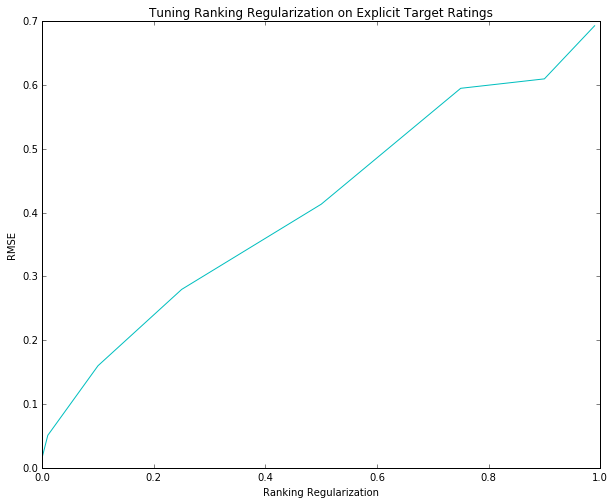

In [12]:
x=np.array([0,.01,.1,.25,.5,.75,.9,.99])
y=np.array([.016460668430915367,.05088695106015607,.16003760731422528,0.27976936252929974,.4133214077837332,.5950865397988541,.6098885076702547,.6931611640547327])
plt.figure(figsize=(10,8))
plt.plot(x,y,'c')

plt.title('Tuning Ranking Regularization on Explicit Target Ratings')
plt.xlabel('Ranking Regularization')
plt.ylabel('RMSE')
    
plt.show()


In [14]:
m_star=  graphlab.ranking_factorization_recommender.create(test,  user_id='userId', item_id='movieId', item_data=movies, target='rating', unobserved_rating_value = 1, ranking_regularization=0)
m_star.evaluate_rmse(test,target='rating') # 'rmse_overall': 0.10831336238668571

view = m_star.views.overview(
        validation_set=test,
        item_data=movies)

view.show()

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 20001 observations with 669 users and 9125 items.

Data prepared in: 0.087126s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 20001 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | 0.0675304                                |

| 4       | 0.078125          | 0.400808                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.15625           | 0.0675304                                |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 84us         | 1.11506           | 1.05596               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 156.967ms    | DIVERGED          | DIVERGED              | 0.15625     |

| RESET   | 196.593ms    | 1.11501           | 1.05594               |             |

| 1       | 418.995ms    | DIVERGED          | DIVERGED              | 0.078125    |

| RESET   | 462.313ms    | 1.11512           | 1.05599               |             |

| 1       | 760.38ms     | 0.979774          | 0.989832              | 0.0390625   |

| 2       | 866.535ms    | 0.664627          | 0.815243              | 0.0390625   |

| 3       | 1.06s        | 0.512398          | 0.715817              | 0.0390625   |

| 4       | 1.20s        | 0.411782          | 0.6417                | 0.0390625   |

| 5       | 1.52s        | 0.334706          | 0.578536              | 0.0390625   |

| 6       | 1.65s        | 0.273628          | 0.523093              | 0.0390625   |

| 8       | 1.99s        | 0.188585          | 0.434261              | 0.0390625   |

| 11      | 2.44s        | 0.113568          | 0.336994              | 0.0390625   |

| 18      | 3.44s        | 0.0405666         | 0.201404              | 0.0390625   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.011735

Final training RMSE: 0.108313